In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
#downloading dataset
if not os.path.exists('PierceCricketData.csv'):
    !wget -nv -O PierceCricketData.csv https://ibm.box.com/shared/static/reyjo1hk43m2x79nreywwfwcdd5yi8zu.csv

df = pd.read_csv("PierceCricketData.csv")
df.head()

,Chirps,Temp
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


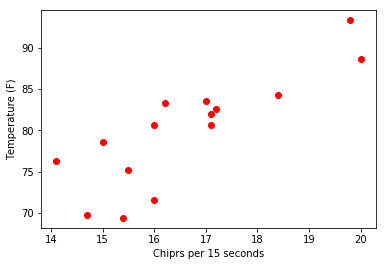

In [3]:
x_data, y_data = (df["Chirps"].values, df["Temp"].values)

plt.plot(x_data, y_data, 'ro')
plt.xlabel("Chiprs per 15 seconds")
plt.ylabel("Temperature (F)")

In [7]:
X = tf.placeholder(tf.float32, shape = (x_data.size))
Y = tf.placeholder(tf.float32, shape = (y_data.size))

m = tf.Variable(3.0)
c = tf.Variable(2.0)

YPred = m*X + c

loss = tf.reduce_mean(tf.squared_difference(YPred, Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate= 0.001)
train = optimizer.minimize(loss)

800.925
169.246
47.461
23.9812
19.4542
18.5812
18.4127
18.3801
18.3736
18.3722
18.3717
18.3714
18.3712
Finished by Convergence Criterion
12
18.3712


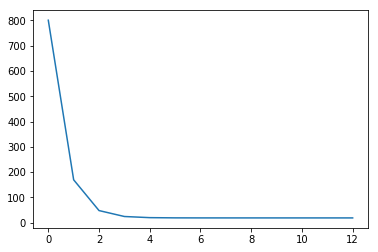

In [8]:
convergenceTolerance = 0.0001
previous_m = np.inf
previous_c = np.inf

steps = {}
steps['m'] = []
steps['c'] = []

losses=[]

init_op = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init_op)
    
    for k in range(1000):
    
        _, _m, _c, _l = sess.run([train, m, c, loss], feed_dict = {X:x_data, Y:y_data})


        steps['m'].append(_m)
        steps['c'].append(_c)
        print _l
        losses.append(_l)

        if (np.abs(previous_m - _m) <= convergenceTolerance) or (np.abs(previous_c - _c) <= convergenceTolerance):

            print "Finished by Convergence Criterion"
            print k
            print _l
            break
        previous_m = _m, 
        previous_c = _c, 

plt.plot(losses[:])